# **Introduction**

====================================================================================================================================================================

Name    : Rizqia Dewi Annisa

Project ini dibuat guna membuat machine learning untuk memprediksi kriteria seseorang memiliki sleep disorder or not berdasarkan Sleep Health and Lifestyle Dataset

====================================================================================================================================================================

# **Import Libraries**

In [1]:
# Download Data
import opendatasets as od

# Reading Data
import pandas as pd

# Math operation
import numpy as np
from scipy import stats

# Visual
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns

# Handling outlier
from feature_engine.outliers import Winsorizer, OutlierTrimmer

# Scale and encod data
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Saving 
import pickle
import joblib

# Turn off warning
import warnings
warnings.filterwarnings('ignore')




# **Data Loading**

In [701]:
od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading sleep-health-and-lifestyle-dataset.zip to .\sleep-health-and-lifestyle-dataset


100%|██████████| 2.54k/2.54k [00:00<00:00, 3.39MB/s]

In [405]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
pd.set_option('min_rows', 20)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## - Check Missing Value

In [407]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [408]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [409]:
sd_nan = df[df['Sleep Disorder'].isna()]
sd_nan

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
10,11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
11,12,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
12,13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
13,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN


In [410]:
sd_nan.nunique()

Person ID                  219
Gender                       2
Age                         27
Occupation                  10
Sleep Duration              23
Quality of Sleep             4
Physical Activity Level     12
Stress Level                 6
BMI Category                 3
Blood Pressure              17
Heart Rate                  10
Daily Steps                 12
Sleep Disorder               0
dtype: int64

In [411]:
df['Sleep Disorder'].fillna('Normal',inplace=True)

**Insight** : 

After exploration, it turned out that **there were no missing value**. The 219 sleeping disorder rows above that were interpreted as missing value turned out to be *none*, which *means they don't have sleeping disorder*. This is based on references from the explanation of Kaggle, where I get the data set. from the explanation explains that None = The individual does not exhibit any specific sleep disorder. But because it says none in the data, the system reads it as a missing value. So, I **change none** from the data 'sleep disorder' **into normal**.

In [412]:
# Make sure missing value have done change into normal
# So there were no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Insight** :

The data successfully replaced so there were no missing values.

## - Check Duplicated Data

In [413]:
df.duplicated().sum()

0

**Insight** :

There is no duplicated data, so we don't need to drop duplicated data.

## - Check Dimention of The Data

In [414]:
# dimention of dataframe
df.shape

(374, 13)

**Insight** :

The data have 374 of rows and 13 of columns.

## - Check Descriptive Statistics of The Data

In [415]:
# descriptive statistics of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


**Insight** :

The table show the value of mean, std, min, quartile 1, median, quartile 3, and max from each columns of the data where have interger and float type (numeric columns).

## - Check Cardinality

In [416]:
uniq = ['Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder']

for i in uniq:
    print('\n------------',i.upper(),'------------------')
    print(df[i].value_counts())
    print('Banyaknya data unik dari',i,' :',df[i].nunique())


------------ GENDER ------------------
Gender
Male      189
Female    185
Name: count, dtype: int64
Banyaknya data unik dari Gender  : 2

------------ AGE ------------------
Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64
Banyaknya data unik dari Age  : 31

------------ OCCUPATION ------------------
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Banyaknya data unik dari Occupation  : 11

------------ SLEEP DURATION ------------------
Sleep Duratio

## - Split Columns Blood Pressure into Systolic and Diastolic

In [417]:
df['Systolic'] = 0
df['Diastolic'] = 0

for i, val in enumerate(df['Blood Pressure']):
    j = 0

    while val[j] != "/":
        j += 1
        continue

    df.loc[i, 'Systolic'] = int(val[:j])
    df.loc[i, 'Diastolic'] = int(val[(j+1):])

df.drop('Blood Pressure', axis=1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80
9,10,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80


## - Change Column Names

In [422]:
df1 = df.copy()

In [423]:
listed = {
            'Person_Id':'Id',
            'Sleep Duration':'Sleep_Duration',
            'Quality of Sleep':'Quality_of_Sleep',
            'Physical Activity Level':'Physical_Activity_Level',
            'Stress Level':'Stress_Level',
            'BMI Category' : 'BMI_Category',
            'Blood Pressure' : 'Blood_Pressure',
            'Heart Rate' : 'Heart_Rate',
            'Daily Steps' : 'Daily_Steps',
            'Sleep Disorder' :'Sleep_Disorder'
         }

df1.rename(columns=listed,inplace=True)

In [421]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

## - Basic Data Information

- **Person ID**                             : An identifier for each individual.

- **Gender**                                : The gender of the person (Male/Female).

- **Age**                                   : The age of the person in years.

- **Occupation**                            : The occupation or profession of the person.

- **Sleep Duration (hours)**                : The number of hours the person sleeps per day.

- **Quality of Sleep (scale: 1-10)**        : A subjective rating of the quality of sleep, ranging from 1 to 10.

- **Physical Activity Level (minutes/day)** : The number of minutes the person engages in physical activity daily.

- **Stress Level (scale: 1-10)**            : A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

- **BMI Category**                          : The BMI category of the person (e.g., Underweight, Normal, Overweight).

- **Blood Pressure (systolic/diastolic)**   : The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

- **Heart Rate (bpm)**                      : The resting heart rate of the person in beats per minute.

- **Daily Steps**                           : The number of steps the person takes per day.

- **Sleep Disorder**                        : The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


**Details about Sleep Disorder Column**:

- *None*        : The individual does not exhibit any specific sleep disorder.

- *Insomnia*    : The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

- *Sleep Apnea* : The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [18]:
df1.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

## - Sleep Disorder Distribution

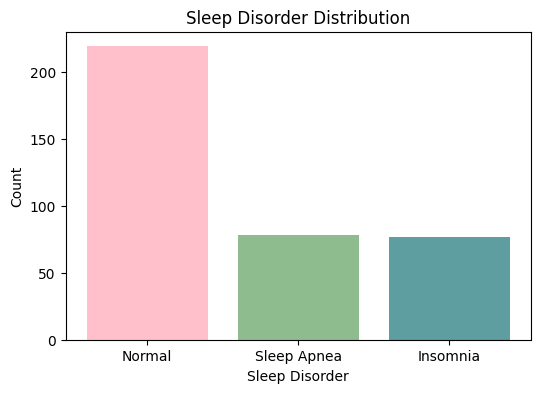

In [19]:
sd_counts = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sd_counts.index, sd_counts.values, color=['pink','darkseagreen','cadetblue'])
plt.title("Sleep Disorder Distribution")
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight** : 

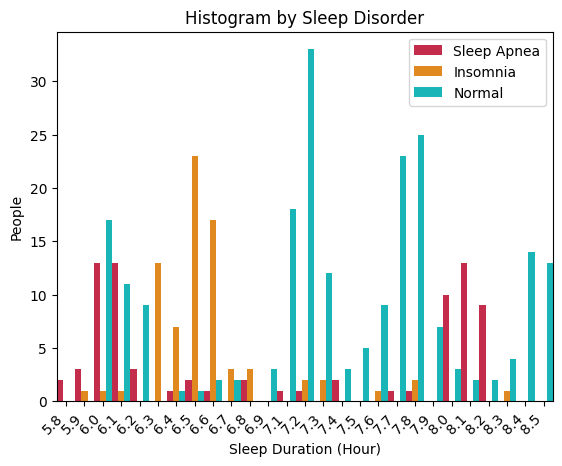

In [80]:
# Histogram by Sleep Disorder
# Grouping the BMI Category by Gender
sleepdisorder_by_sleepduration = df.groupby(
    ['Sleep Duration', 'Sleep Disorder']).size().reset_index(name='count')

sleepdisorder_colors = {'Normal': 'darkturquoise', 'Sleep Apnea': 'crimson', 'Insomnia': 'darkorange'}

# Sort the data by count
sleepdisorder_by_sleepduration = sleepdisorder_by_sleepduration.sort_values(
    by='count', ascending=False)


# Plot the data
sns.barplot(y='count', x='Sleep Duration', hue='Sleep Disorder', data=sleepdisorder_by_sleepduration, palette=sleepdisorder_colors, width=1)
plt.xticks(rotation=45, ha='right')
plt.title('Histogram by Sleep Disorder')
plt.xlabel('Sleep Duration (Hour)')
plt.ylabel('People')
plt.legend()
    
plt.show()


## - BMI Category Distribution

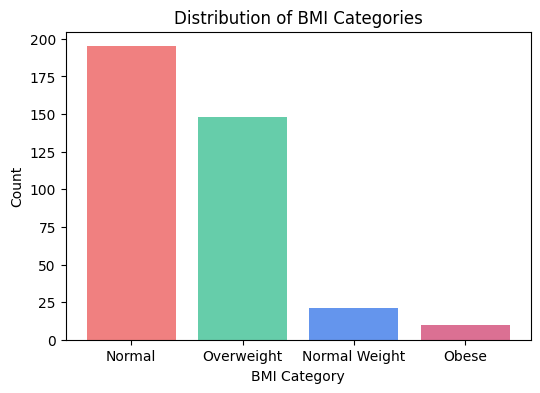

In [29]:
bmi_counts = df['BMI Category'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(bmi_counts.index, bmi_counts.values, color=['lightcoral','mediumaquamarine','cornflowerblue','palevioletred'])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight** :

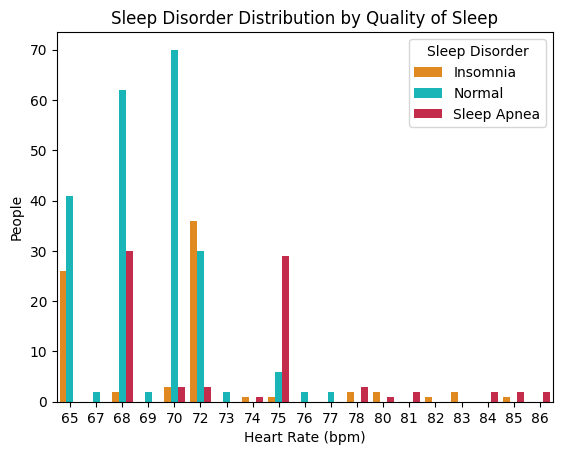

In [483]:
# Grouping the BMI Category by Gender
sleepdisorder_by_stress = df.groupby(
    ['Heart Rate', 'Sleep Disorder']).size().reset_index(name='count')

sleepdisorder_color = {'Normal': 'darkturquoise', 'Sleep Apnea': 'crimson', 'Insomnia': 'darkorange'}

# Sort the data by count
gender_by_bmi = sleepdisorder_by_stress.sort_values(
    by='count', ascending=False)


# Plot the data
sns.barplot(y='count', x='Heart Rate', hue='Sleep Disorder', data=sleepdisorder_by_stress,
            palette=sleepdisorder_color, width=0.8)

# Set the title and axis labels
plt.title('Sleep Disorder Distribution by Quality of Sleep')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('People')

plt.xticks()


# Show the plot
plt.show()

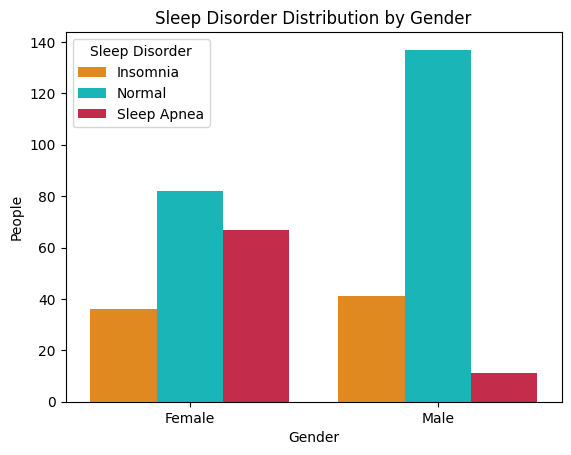

In [85]:
# Grouping the BMI Category by Gender
sleepdisorder_by_gender = df.groupby(
    ['Gender', 'Sleep Disorder']).size().reset_index(name='count')

sleepdisorder_color = {'Normal': 'darkturquoise', 'Sleep Apnea': 'crimson', 'Insomnia': 'darkorange'}

# Sort the data by count
gender_by_bmi = sleepdisorder_by_gender.sort_values(
    by='count', ascending=False)


# Plot the data
sns.barplot(y='count', x='Gender', hue='Sleep Disorder', data=sleepdisorder_by_gender,
            palette=sleepdisorder_color, width=0.8)

# Set the title and axis labels
plt.title('Sleep Disorder Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('People')

plt.xticks()


# Show the plot
plt.show()

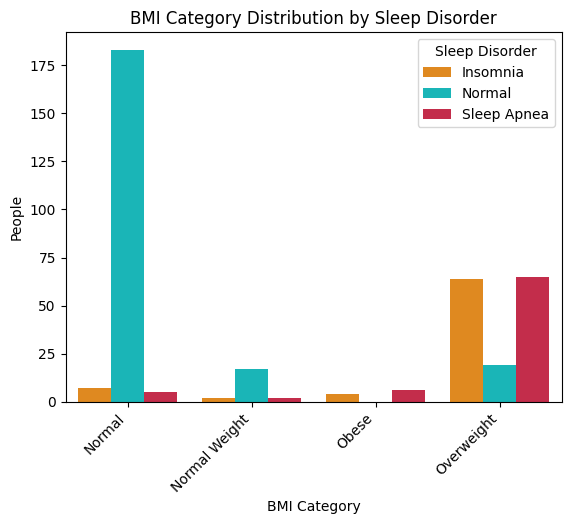

In [499]:
# Grouping the BMI Category by Gender
sleepdisorder_by_bmi = df.groupby(
    ['BMI Category', 'Sleep Disorder']).size().reset_index(name='count')

sleepdisorder_color = {'Normal': 'darkturquoise', 'Sleep Apnea': 'crimson', 'Insomnia': 'darkorange'}

# Sort the data by count
gender_by_bmi = sleepdisorder_by_bmi.sort_values(
    by='count', ascending=False)


# Plot the data
sns.barplot(y='count', x='BMI Category', hue='Sleep Disorder', data=sleepdisorder_by_bmi,
            palette=sleepdisorder_color, width=0.8)

# Set the title and axis labels
plt.title('BMI Category Distribution by Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('People')

plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

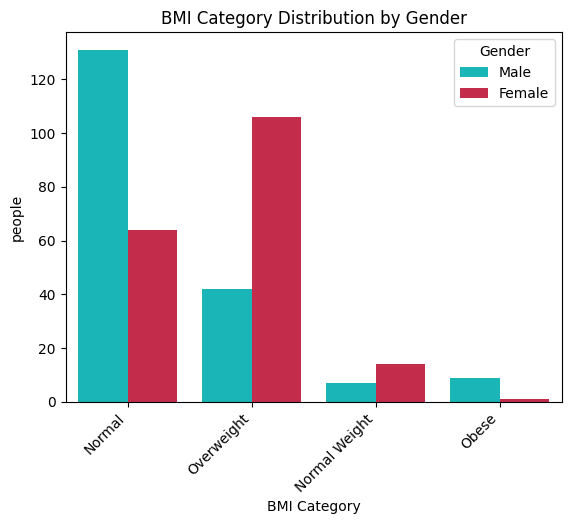

In [69]:
# Grouping the BMI Category by Gender
gender_by_bmi = df.groupby(
    ['BMI Category', 'Gender']).size().reset_index(name='count')

gender_colors = {'Male': 'darkturquoise', 'Female': 'crimson'}

# Sort the data by count
gender_by_bmi = gender_by_bmi.sort_values(
    by='count', ascending=False)


# Plot the data
sns.barplot(y='count', x='BMI Category', hue='Gender', data=gender_by_bmi,
            palette=gender_colors, width=0.8)

# Set the title and axis labels
plt.title('BMI Category Distribution by Gender')
plt.xlabel('BMI Category')
plt.ylabel('people')

plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

**Insight** : Based on the bar plot, it can be seen that more female have an overweight BMI category than male. But, male have the most BMI category obese than female. However, the men have the most averege bmi category normal than women.

## - Daily Step Occupation by Sleep Disorder

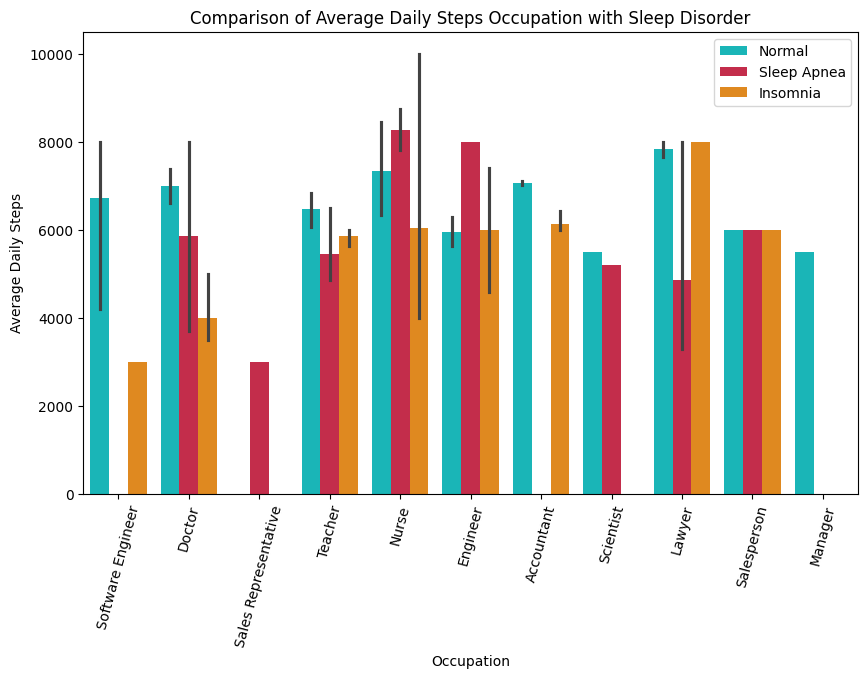

In [77]:
plt.figure(figsize=(10,6))
sleepdisorder_colors = {'Normal': 'darkturquoise', 'Sleep Apnea': 'crimson', 'Insomnia': 'darkorange'}
sns.barplot(x='Occupation', y='Daily Steps', hue='Sleep Disorder', data=df, palette=sleepdisorder_colors)
plt.title('Comparison of Average Daily Steps Occupation with Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Average Daily Steps')
plt.xticks(rotation=75)
plt.legend()
plt.show()

**Insight** : Based on the bar plot above, it can be seen that the occupation who has the most daily steps are nurse. The other hand, the occupation who have the fewest daily steps are sales representative.

In [723]:
mean_sleep_duration = df['Sleep Duration'].mean()
median_sleep_duration = df['Sleep Duration'].median()
print("Mean Sleep Duration:", mean_sleep_duration)
print("Median Sleep Duration:", median_sleep_duration)

Mean Sleep Duration: 7.132085561497325
Median Sleep Duration: 7.2


# **Feature Engineering**

Dalam feature engineering ini, data akan dibagi menjadi 2 kelompok berdasarkan dengan kategori data(numerical dan categorical). Hal tersebut bertujuan udah memudahkan dalam melihat hasil analisa korelasinya dengan targetnya berupa 'Sleep Disorder'

In [424]:
df1.drop('Person ID', axis=1, inplace=True)
df1.drop('Blood_Pressure', axis=1, inplace=True)

In [725]:
# # Split data
# X = df1.drop(['Sleep_Disorder'], axis=1)
# y = df1['Sleep_Disorder']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print(f"Shape data train : {X_train.shape}")
# print(f"Shape data test : {X_test.shape}")


In [425]:
# Melakukan pergantian nilai pada kolom 'Churn' menjadi integer
df1['Sleep_Disorder'].replace({'Normal':0,'Sleep Apnea':1, 'Insomnia':2},inplace=True)

In [727]:
# # Mencari kolom yang normal dan skew
# xtrain_num = X_train[['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
#                       'Stress_Level', 'Heart_Rate', 'Daily_Steps','Systolic', 'Diastolic']]
# xtrain_cat = X_train[['Gender', 'Occupation', 'BMI_Category']]

# skewnes = []
# normal = []
# for i in xtrain_num :
#     # print(i)
#     skew = xtrain_num[i].skew()
#     if skew < -0.5 or skew > 0.5:
#         skewnes.append(i)
#     else:
#         normal.append(i)

# print(f"kolom yang skew : {skewnes}")
# print(f"kolom yang normal : {normal}")

- Numerical Columns

In [426]:
numeric = df1[['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
               'Stress_Level', 'Heart_Rate', 'Daily_Steps','Systolic', 'Diastolic','Sleep_Disorder']]

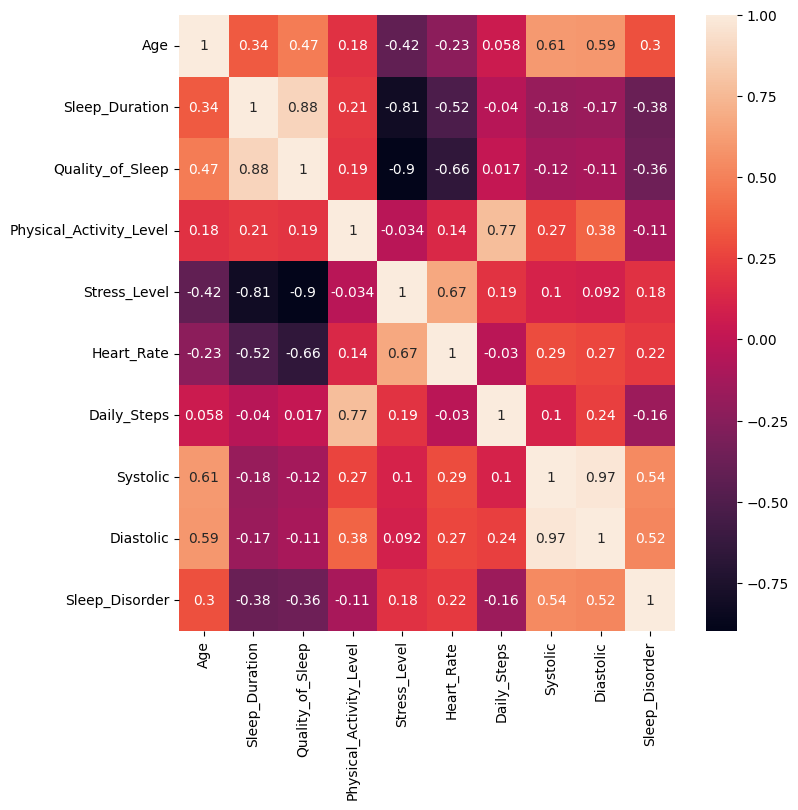

In [427]:
# show correlation data numeric columns
plt.figure(figsize=(8,8))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

In [428]:
# heatmap = X_train[['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
#                    'Stress_Level', 'Heart_Rate', 'Daily_Steps','Systolic', 'Diastolic']].copy()
# heatmap['Sleep_Disorder'] = y_train

# # Uji Pearson's
# plt.figure(figsize=(8,8))
# sns.heatmap(heatmap.corr(method='pearson'),annot=True,fmt=".1f",linewidths="1");


In [430]:
# Mencari korelasi secara statistik
for i in numeric.columns :
    
    corr_tau, pval_k = stats.kendalltau(numeric[i], numeric['Sleep_Disorder'])

    print(f"tau-correlation {i} : {corr_tau:.2f}, p-value: {pval_k}")
    print("--------------------------------------------------------------")

tau-correlation Age : 0.29, p-value: 4.058446377072938e-12
--------------------------------------------------------------
tau-correlation Sleep_Duration : -0.24, p-value: 3.965055480885847e-09
--------------------------------------------------------------
tau-correlation Quality_of_Sleep : -0.28, p-value: 8.458965743542377e-10
--------------------------------------------------------------
tau-correlation Physical_Activity_Level : -0.03, p-value: 0.5078033609143571
--------------------------------------------------------------
tau-correlation Stress_Level : 0.12, p-value: 0.004462882715356297
--------------------------------------------------------------
tau-correlation Heart_Rate : 0.19, p-value: 2.2034036039673015e-05
--------------------------------------------------------------
tau-correlation Daily_Steps : -0.13, p-value: 0.002561380007976266
--------------------------------------------------------------
tau-correlation Systolic : 0.50, p-value: 5.3220322349647406e-30
-------------

**Insight** : all numerical feature correlation values are good.

- Categorical Columns

In [431]:
categoric = df1[['Gender', 'Occupation', 'BMI_Category','Sleep_Disorder']]

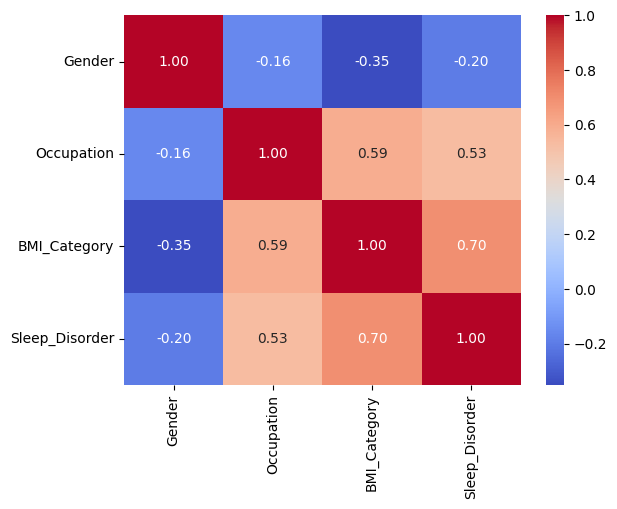

In [432]:
for col in categoric.columns:
    if categoric[col].dtype == 'object':
        categoric[col] = LabelEncoder().fit_transform(categoric[col])

# Calculating correlation after encoding
correlation_acc = categoric.corr(method='kendall')

# Creating a heatmap for the correlation matrix
sns.heatmap(correlation_acc, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [433]:
# Mencari korelasi secara statistik
for i in categoric.columns :
    corr_tau, pval_k = stats.kendalltau(categoric[i], categoric['Sleep_Disorder'])
    print(f"tau-correlation {i} : {corr_tau:.2f}, p-value: {pval_k}")
    print("--------------------------------------------------------------")

tau-correlation Gender : -0.20, p-value: 4.989003766273843e-05
--------------------------------------------------------------
tau-correlation Occupation : 0.53, p-value: 5.216511700097083e-35
--------------------------------------------------------------
tau-correlation BMI_Category : 0.70, p-value: 3.024112064940996e-48
--------------------------------------------------------------
tau-correlation Sleep_Disorder : 1.00, p-value: 1.558755308411635e-99
--------------------------------------------------------------


## - Skew

In [434]:
skewness = []
normal = []


for i in numeric.columns:
    skew = df1[i].skew()
    if skew <-0.5 or skew >0.5:
        skewness.append(i)
    else:
        normal.append(i)


print(f'Kolom yang skewness: {skewness}')
print(f'Kolom yang normal: {normal}')

Kolom yang skewness: ['Heart_Rate', 'Sleep_Disorder']
Kolom yang normal: ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'Daily_Steps', 'Systolic', 'Diastolic']


## - VIF

In [436]:
# definisi vif
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

df_new= df1[['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
             'Physical_Activity_Level', 'Stress_Level', 'BMI_Category',
             'Systolic', 'Diastolic', 'Heart_Rate', 'Daily_Steps','Sleep_Disorder']]

df_new = df_new.apply(LabelEncoder().fit_transform)

calc_vif(df_new)

,variables,VIF
0,Gender,6.624188
1,Age,41.411320
2,Occupation,7.762742
3,Sleep_Duration,26.525572
4,Quality_of_Sleep,51.466365
5,Physical_Activity_Level,17.357372
6,Stress_Level,21.143163
7,BMI_Category,16.390731
8,Systolic,275.116054
9,Diastolic,233.247441


**Insight** : The diastolic column has a very high VIF value, so it has the potential to have a very high correlation value with other variables. For this reason, the diastolic column will be removed.

In [437]:
df_new.drop('Diastolic',axis=1,inplace=True)

In [438]:
calc_vif(df_new)

,variables,VIF
0,Gender,4.843763
1,Age,31.540649
2,Occupation,6.731685
3,Sleep_Duration,22.912840
4,Quality_of_Sleep,48.252432
5,Physical_Activity_Level,17.318635
6,Stress_Level,20.825530
7,BMI_Category,10.975182
8,Systolic,17.443410
9,Heart_Rate,9.703699


**Insight** : After the diastolic column was successfully removed, the VIF values of several feature were still high. Then we will delete features that have a high VIF value, namely Daily_Steps.

In [439]:
df_new.drop('Daily_Steps',axis=1,inplace=True)

In [440]:
calc_vif(df_new)

,variables,VIF
0,Gender,4.727519
1,Age,30.658635
2,Occupation,6.369566
3,Sleep_Duration,22.900970
4,Quality_of_Sleep,34.994208
5,Physical_Activity_Level,4.612885
6,Stress_Level,7.846127
7,BMI_Category,10.974891
8,Systolic,17.338063
9,Heart_Rate,5.698495


**Insight** : After the Daily_Steps column was successfully removed, the VIF values of several feature were still high. Then we will delete features that have a high VIF value, namely Quality_of_Sleep.

In [441]:
df_new.drop('Quality_of_Sleep',axis=1,inplace=True)

In [442]:
calc_vif(df_new)

,variables,VIF
0,Gender,4.685643
1,Age,24.442922
2,Occupation,5.695175
3,Sleep_Duration,12.622741
4,Physical_Activity_Level,4.311654
5,Stress_Level,7.419936
6,BMI_Category,10.136553
7,Systolic,17.034675
8,Heart_Rate,5.667621
9,Sleep_Disorder,3.814987


**Insight** : After the Quality_of_Sleep column was successfully removed, the VIF values of several feature were still high. Then we will delete features that have a high VIF value, namely Age.

In [443]:
df_new.drop('Age',axis=1,inplace=True)

In [444]:
calc_vif(df_new)

,variables,VIF
0,Gender,3.350156
1,Occupation,5.136104
2,Sleep_Duration,3.934838
3,Physical_Activity_Level,4.262187
4,Stress_Level,6.141651
5,BMI_Category,8.106043
6,Systolic,10.595580
7,Heart_Rate,4.544075
8,Sleep_Disorder,3.807032


**Insight** : After the Age column was successfully removed, the VIF values of several feature were still high. Then we will delete features that have a high VIF value, namely Systolic.

In [445]:
df_new.drop('Systolic',axis=1,inplace=True)

In [446]:
calc_vif(df_new)

,variables,VIF
0,Gender,3.339110
1,Occupation,4.906587
2,Sleep_Duration,3.231144
3,Physical_Activity_Level,4.118935
4,Stress_Level,6.007884
5,BMI_Category,7.028270
6,Heart_Rate,4.455095
7,Sleep_Disorder,3.728297


In [447]:
df1["Heart_Rate"].unique()

array([77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 81, 65, 84, 74, 67, 73,
       83, 86], dtype=int64)

**Insight** : The VIF value for all features are now good, indicating that there is no longer any multicollinearity between features.

## - Feature Splitting

In [448]:
X = df_new[['Gender','Occupation','Sleep_Duration','Physical_Activity_Level','Stress_Level','BMI_Category','Heart_Rate']]
y = df_new['Sleep_Disorder']

In [449]:
y

0      0
1      0
2      0
3      1
4      1
5      2
6      2
7      0
8      0
9      0
      ..
364    1
365    1
366    1
367    1
368    1
369    1
370    1
371    1
372    1
373    1
Name: Sleep_Disorder, Length: 374, dtype: int64

In [450]:
# splitting menjadi train dan test dengan proporsi data train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (299, 7)
Test Size :  (75, 7)


In [278]:
# X_train = X_train.apply(LabelEncoder().fit_transform)
# X_test = X_test.apply(LabelEncoder().fit_transform)

## - Handling Outlier

In [451]:
def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

Distribution of Feature and Outlier Before Handling Outlier


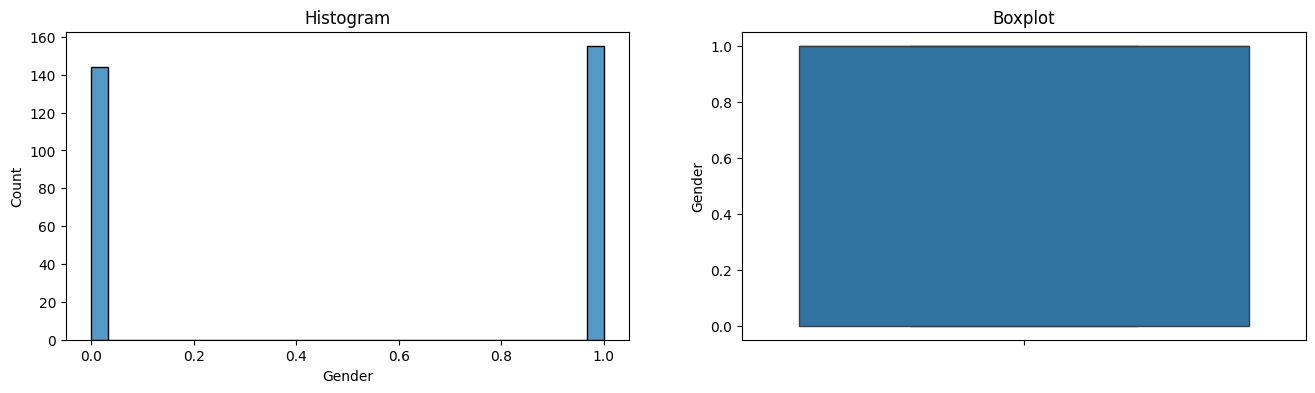


Skewness Value Gender X_train:  -0.07400019546933856


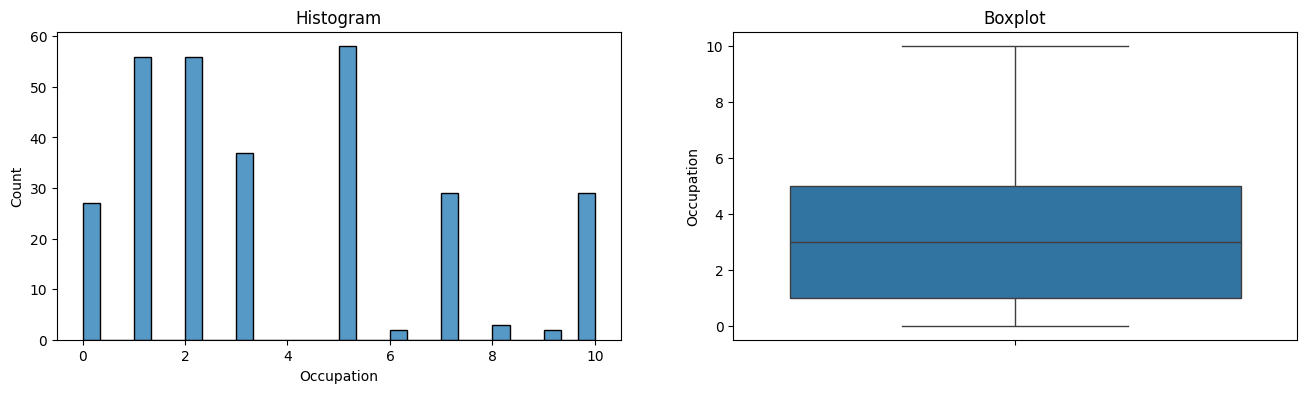


Skewness Value Occupation X_train:  0.7624338291501104


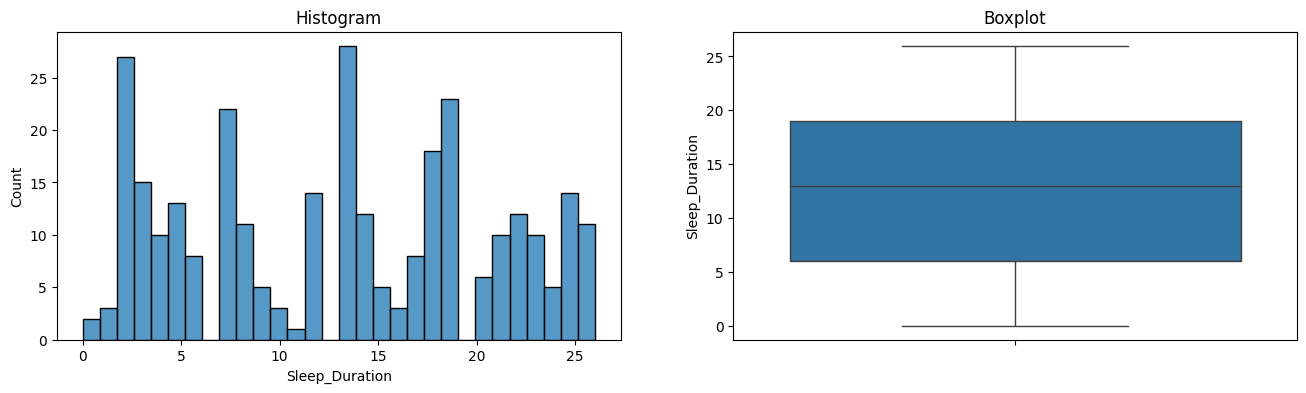


Skewness Value Sleep Duration X_train:  0.042783545532198645


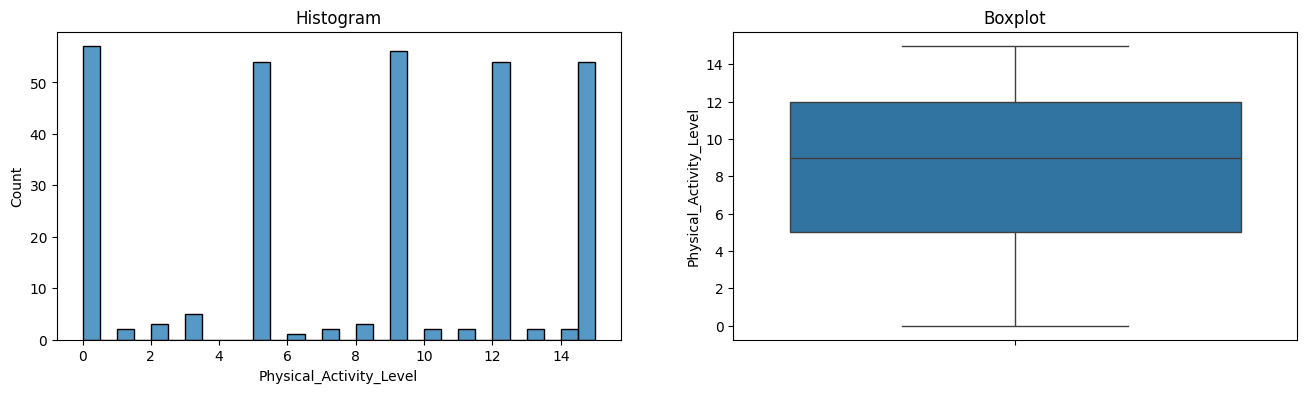


Skewness Value Physical Activity Level X_train:  -0.23636644300550994


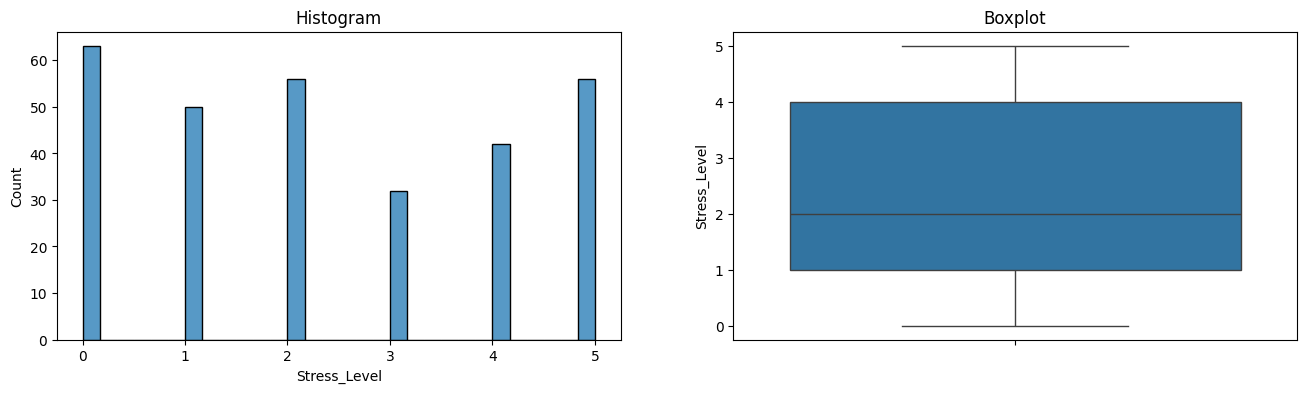


Skewness Value Stress Level X_train:  0.15261765950537454


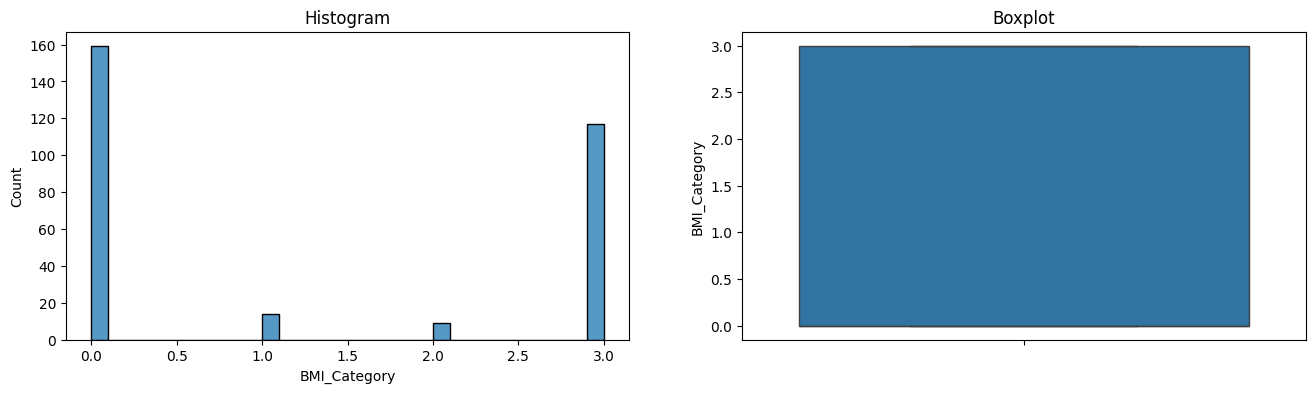


Skewness Value BMI Category X_train:  0.30186203951735796


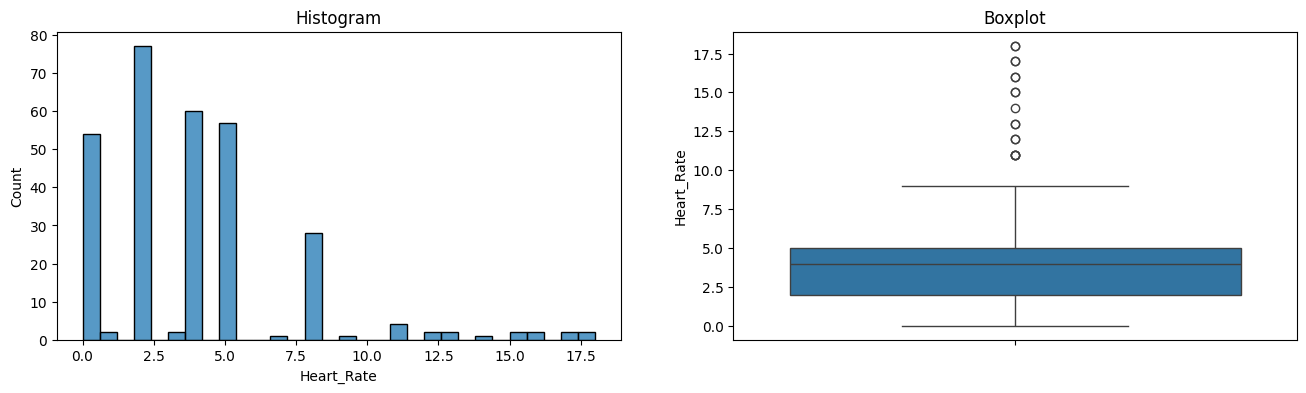


Skewness Value Heart Rate X_train:  1.6076934722005898


In [452]:
# Check distribution of features and outliers using Boxplot
print('Distribution of Feature and Outlier Before Handling Outlier')

diagnostic_plots(X_train, 'Gender')
print('\nSkewness Value Gender X_train: ', X_train['Gender'].skew())

diagnostic_plots(X_train, 'Occupation')
print('\nSkewness Value Occupation X_train: ', X_train['Occupation'].skew())

diagnostic_plots(X_train, 'Sleep_Duration')
print('\nSkewness Value Sleep Duration X_train: ', X_train['Sleep_Duration'].skew())

diagnostic_plots(X_train, 'Physical_Activity_Level')
print('\nSkewness Value Physical Activity Level X_train: ', X_train['Physical_Activity_Level'].skew())

diagnostic_plots(X_train, 'Stress_Level')
print('\nSkewness Value Stress Level X_train: ', X_train['Stress_Level'].skew())

diagnostic_plots(X_train, 'BMI_Category')
print('\nSkewness Value BMI Category X_train: ', X_train['BMI_Category'].skew())

diagnostic_plots(X_train, 'Heart_Rate')
print('\nSkewness Value Heart Rate X_train: ', X_train['Heart_Rate'].skew())

**Insight** : There is outlier only in heart rate column,so we gonna handling outlier in heart rate column.

In [453]:

winsoriser = Winsorizer(capping_method='iqr',
                                 tail='both',
                                 fold=1.5,
                                 variables= ['Gender','Occupation','Sleep_Duration','Physical_Activity_Level',
                                             'Stress_Level','BMI_Category','Heart_Rate'])

winsoriser.fit(df_new)
data_clean = winsoriser.fit_transform(df_new)

Distribution Feature and Outlier After Handling Outlier


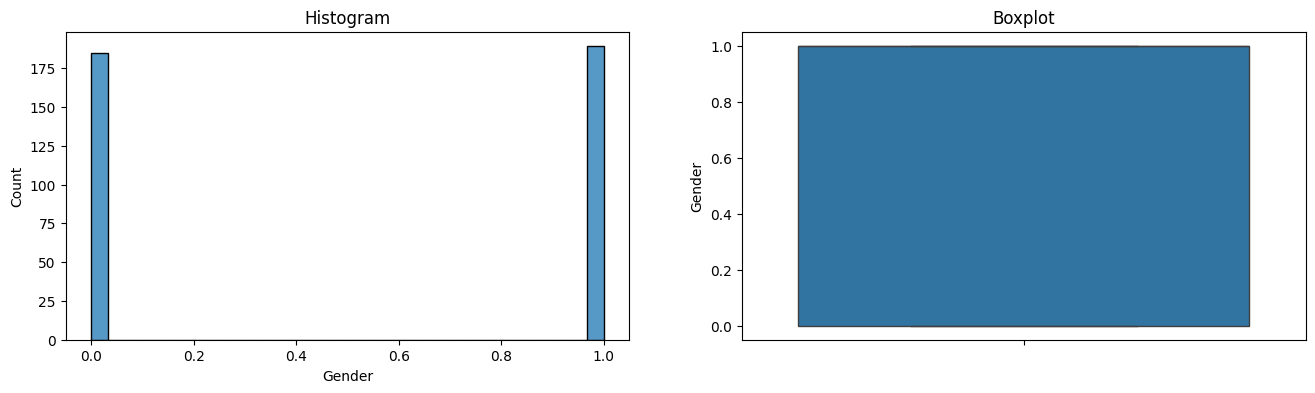


Skewness Value Gender X_train:  -0.0214778350249592


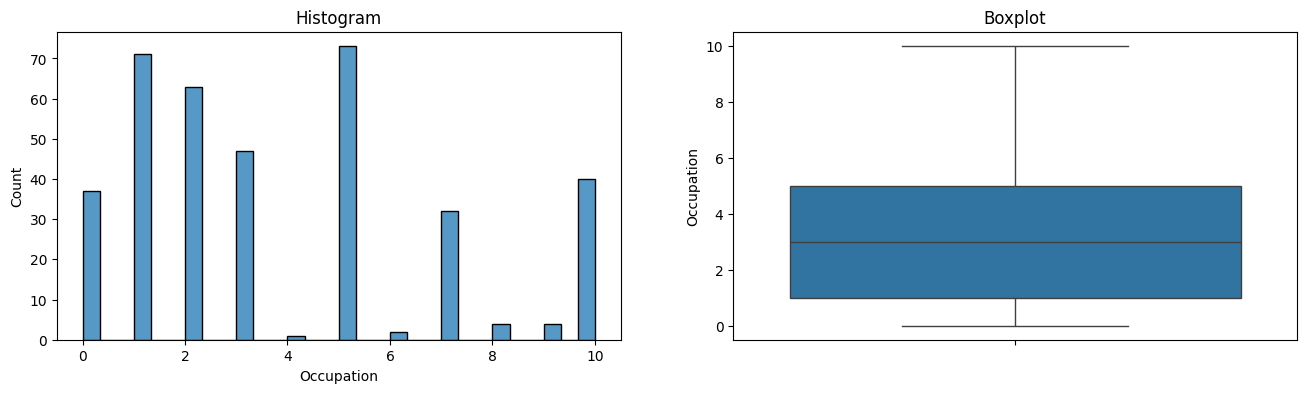


Skewness Value Occupation X_train:  0.7453272412315881


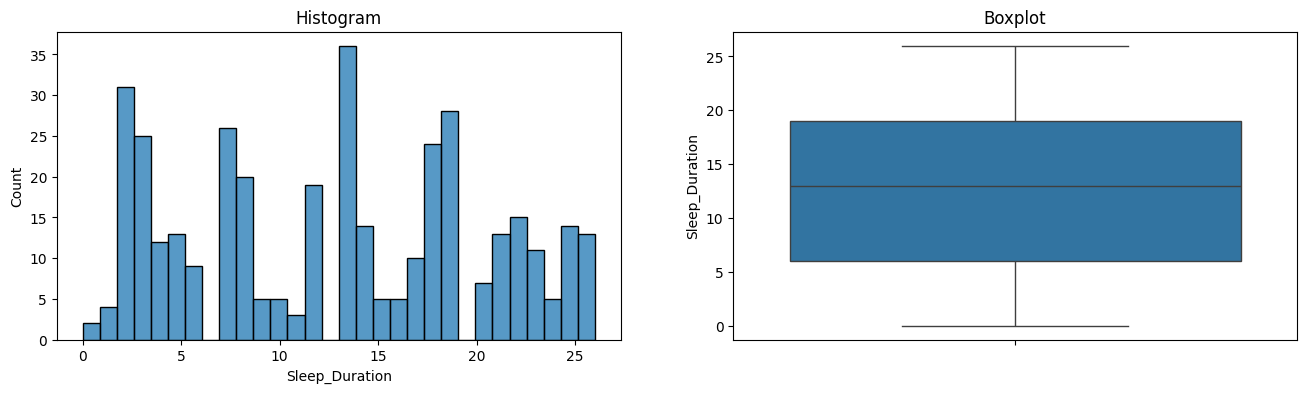


Skewness Value Sleep Duration X_train:  0.07833580939988968


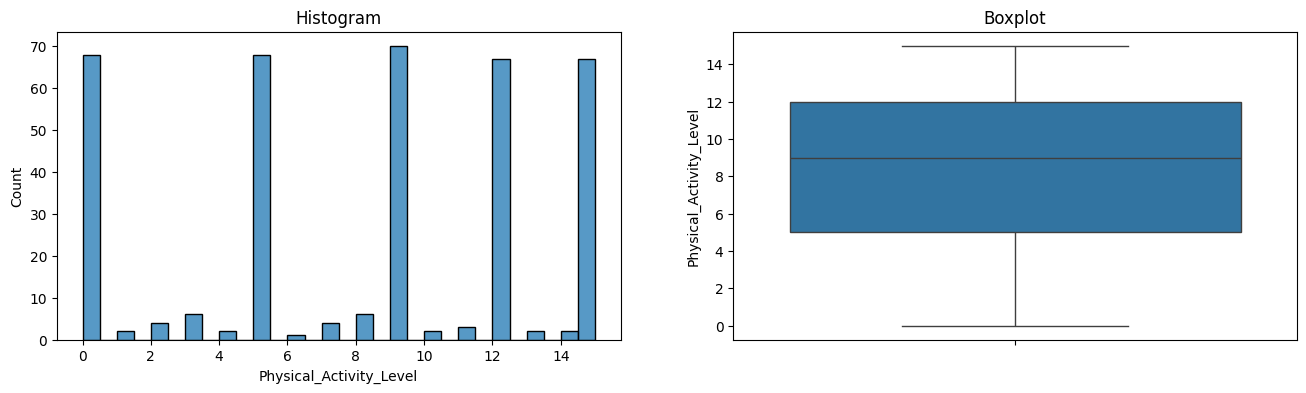


Skewness Value Physical Activity Level X_train:  -0.2325115053204781


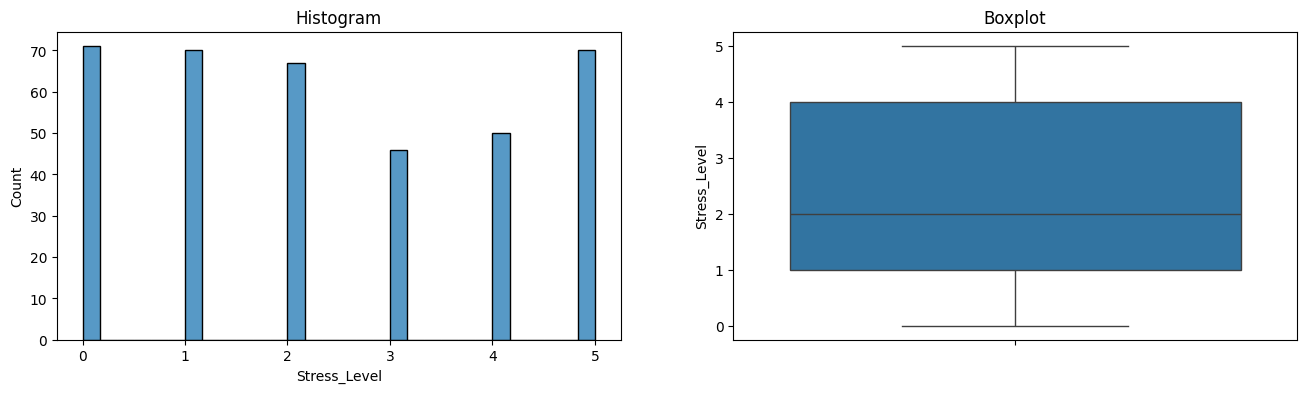


Skewness Value Stress Level X_train:  0.15432958161578159


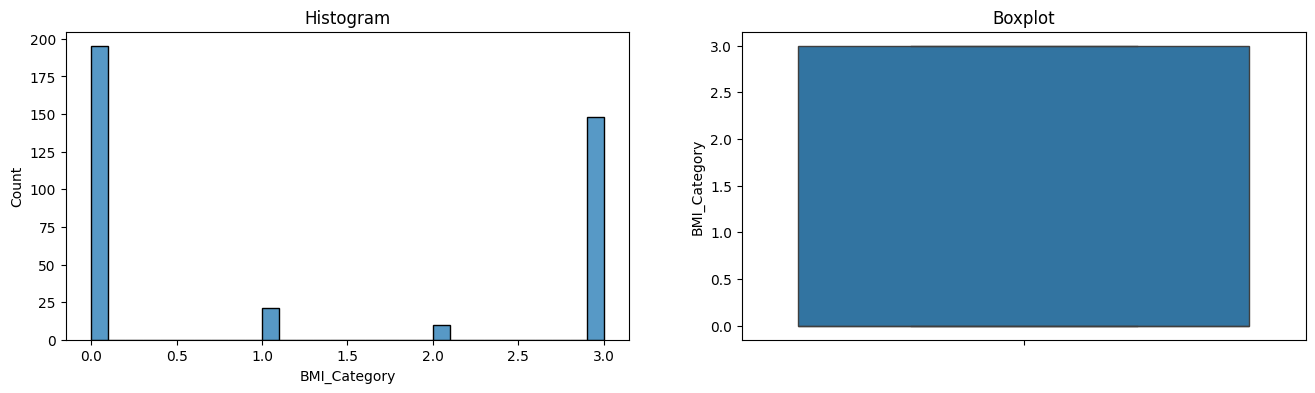


Skewness Value BMI Category X_train:  0.28402097776157614


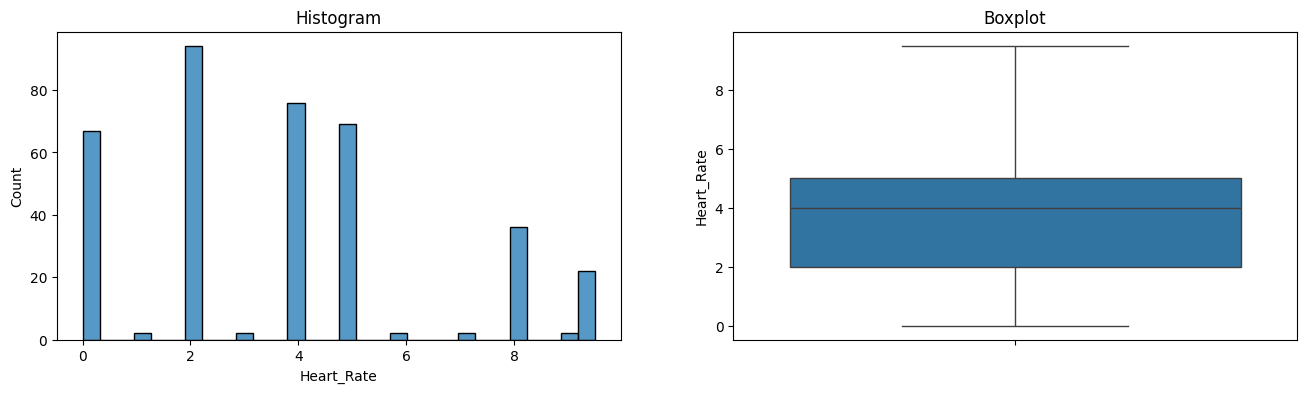


Skewness Value Heart Rate X_train:  0.4865670692541759


In [454]:
# Check distribution of features and outliers using Boxplot
print('Distribution Feature and Outlier After Handling Outlier')

diagnostic_plots(data_clean, 'Gender')
print('\nSkewness Value Gender X_train: ', data_clean['Gender'].skew())

diagnostic_plots(data_clean, 'Occupation')
print('\nSkewness Value Occupation X_train: ', data_clean['Occupation'].skew())

diagnostic_plots(data_clean, 'Sleep_Duration')
print('\nSkewness Value Sleep Duration X_train: ', data_clean['Sleep_Duration'].skew())

diagnostic_plots(data_clean, 'Physical_Activity_Level')
print('\nSkewness Value Physical Activity Level X_train: ', data_clean['Physical_Activity_Level'].skew())

diagnostic_plots(data_clean, 'Stress_Level')
print('\nSkewness Value Stress Level X_train: ', data_clean['Stress_Level'].skew())

diagnostic_plots(data_clean, 'BMI_Category')
print('\nSkewness Value BMI Category X_train: ', data_clean['BMI_Category'].skew())

diagnostic_plots(data_clean, 'Heart_Rate')
print('\nSkewness Value Heart Rate X_train: ', data_clean['Heart_Rate'].skew())

**Insight**: Outlier successfully handled

## - Scaling and Encoding

In [455]:
cat_col= data_clean[['Gender','Occupation','BMI_Category']]
num_col= data_clean[['Sleep_Duration','Physical_Activity_Level','Heart_Rate']]
ordinal= data_clean[['Stress_Level']]

In [456]:
# membuat pipeline yang berisi scaling dan encoding
scaler = StandardScaler()
encoding = OneHotEncoder(handle_unknown='ignore')
preprocess = ColumnTransformer([('cat',encoding,cat_col),
                              ('num',scaler,num_col),
                                ('passthrough', 'passthrough', ordinal)])

preprocess

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                      Gender  Occupation  BMI_Category
0         1           9             3
1         1           1             0
2         1           1             0
3         1           6             2
4         1           6             2
5         1           9             2
6         1          10             2
7         1           1             0
8         1           1             0
9         1           1             0
..      ...         ...           ...
364       0           5             3
365       0           5             3
366       0           5             3
367       0           5             3
368       0           5             3
369       0           5             3
370       0           5             3
371       0           5             3
372       0           5             3
373       0           5             3

[374 rows x 3 columns]),
                                ('num', StandardScaler(),
                                      Sleep_Duration  Physical_Activity_Level  Heart_Rate
0                 3                        4         9.5
1                 4                        9         8.0
2                 4                        9         8.0
3                 1                        0         9.5
4                 1                        0         9.5
5                 1                        0         9.5
6                 5                        3         9.5
7                19                       12         4.0
8                19                       12         4.0
9                19                       12         4.0
..              ...                      ...         ...
364              21                       12         2.0
365              21                       12         2.0
366              22                       12         2.0
367              21                       12         2.0
368              22                       12         2.0
369              22                       12         2.0
370              21                       12         2.0
371              22                       12         2.0
372              22                       12         2.0
373              22                       12         2.0

[374 rows x 3 columns]),
                                ('passthrough', 'passthrough',
                                      Stress_Level
0               3
1               5
2               5
3               5
4               5
5               5
6               4
7               3
8               3
9               3
..            ...
364             0
365             0
366             0
367             0
368             0
369             0
370             0
371             0
372             0
373             0

[374 rows x 1 columns])])

In [457]:
X_train_final = pd.concat([cat_col,num_col,ordinal],axis=1)
X_test_final = pd.concat([cat_col,num_col,ordinal],axis=1)

In [458]:
# splitting menjadi train dan test dengan proporsi data train 80%
X_train_final, X_test_final, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=10)
print('Train Size : ', X_train_final.shape)
print('Test Size : ', X_test_final.shape)

Train Size :  (299, 7)
Test Size :  (75, 7)


In [459]:
X_train_final

,Gender,Occupation,Sleep_Duration,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate
77,1,1,2,0,5,0,5
280,0,5,2,15,5,3,8
121,0,0,13,9,1,0,2
167,1,3,12,8,3,3,5
160,1,3,13,9,2,0,2
359,0,5,22,12,0,3,2
331,0,2,25,0,0,0,0
353,0,5,21,12,0,3,2
31,0,5,6,2,4,1,11
278,0,5,3,15,5,3,8


In [460]:
y_train

77     0
280    0
121    0
167    0
160    0
359    0
331    0
353    1
31     2
278    2
      ..
16     1
127    0
372    1
166    0
153    0
187    2
33     0
348    1
170    0
79     0
Name: Sleep_Disorder, Length: 299, dtype: int64

## - Handling Imbalance Data

In [461]:
# melakukan under sampling
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)

X_res, y_res = cc.fit_resample(X_train_final, y_train)
y_res.value_counts()

Sleep_Disorder
0    62
1    62
2    62
Name: count, dtype: int64

# **Model Definition**

In [462]:
# membuat pipeline untuk setiap model
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=100))])
pipe_svm = Pipeline([('svc', SVC())])
pipe_knn = Pipeline([('knn', KNeighborsClassifier())])
pipe_dt = Pipeline([('dt', DecisionTreeClassifier())])
pipe_gbc = Pipeline([('gbc', GradientBoostingClassifier())])
pipe_xgb = Pipeline([('xgb', XGBClassifier())])
pipe_logreg = Pipeline([('logreg',LogisticRegression())])

In [512]:
pipe_rf

Pipeline(steps=[('rf', RandomForestClassifier())])

In [513]:
pipe_svm

Pipeline(steps=[('svc', SVC())])

# **Model Training**

## - Baseline

In [466]:
# cross validation every model
cv_svm_model = cross_val_score(pipe_svm, X_train_final, y_train, cv=3)
cv_rf_model = cross_val_score(pipe_rf, X_train_final, y_train, cv=3)
cv_knn_model = cross_val_score(pipe_knn, X_train_final, y_train, cv=3)
cv_dt_model = cross_val_score(pipe_dt, X_train_final, y_train, cv=3)
cv_gbc_model = cross_val_score(pipe_gbc, X_train_final,y_train, cv=3)
cv_xgb_model = cross_val_score(pipe_xgb, X_train_final, y_train, cv=3)
cv_logreg_model = cross_val_score(pipe_logreg, X_train_final, y_train, cv=3)

In [467]:
# cross validation each model
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_rf_model,cv_dt_model,cv_gbc_model,cv_xgb_model,cv_logreg_model],['knn_model','svm_model','rf_model','dt_model','gbc_model','xgb_model','logreg_model']):
    print(name)
    print('f1-score - All - Cross Validation  : ', cv)
    print('f1-score - Mean - Cross Validation : ', cv.mean())
    print('f1-score - Std - Cross Validation  : ', cv.std())
    print('f1-score - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
f1-score - All - Cross Validation  :  [0.83      0.92      0.8989899]
f1-score - Mean - Cross Validation :  0.8829966329966329
f1-score - Std - Cross Validation  :  0.03844336455834325
f1-score - Range of Test-Set       :  0.8445532684382896 - 0.9214399975549762
--------------------------------------------------
svm_model
f1-score - All - Cross Validation  :  [0.82      0.91      0.8989899]
f1-score - Mean - Cross Validation :  0.8763299663299664
f1-score - Std - Cross Validation  :  0.04008411498432196
f1-score - Range of Test-Set       :  0.8362458513456444 - 0.9164140813142884
--------------------------------------------------
rf_model
f1-score - All - Cross Validation  :  [0.83       0.93       0.92929293]
f1-score - Mean - Cross Validation :  0.8964309764309765
f1-score - Std - Cross Validation  :  0.04697468083571484
f1-score - Range of Test-Set       :  0.8494562955952616 - 0.9434056572666913
--------------------------------------------------
dt_model
f1-score - All - 

## - Hyperparameter

### Gradient Boosting Classifier

In [468]:
# Mendefinisikan parameter
parameters = {
    'gb__n_estimators': stats.randint(30, 101),
    'gb__max_depth': stats.randint(3, 8),
    'gb__learning_rate': stats.uniform(0.01, 0.2 - 0.01),
    'gb__subsample': [0.8, 1.0],
    'gb__min_samples_split': stats.randint(2, 11),
    'gb__min_samples_leaf': stats.randint(1, 5),
    'gb__max_features': ['auto', 'sqrt', 'log2']
}

In [469]:
gb_classifier = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Define the parameter distribution for RandomizedSearchCV
grid_search_params = {
    'gb__n_estimators': [10, 50, 100, 200],  # jumlah pohon dalam hutan
    'gb__max_depth': [None, 10, 20, 30],  # kedalaman maksimum pohon
    'gb__min_samples_split': [2, 5, 10],  # jumlah sampel minimum yang diperlukan untuk membagi node internal
    'gb__min_samples_leaf': [1, 2, 4],  # jumlah sampel minimum yang diperlukan di setiap node daun
}

# Create the pipeline with GradientBoostingClassifier
final_pipe = Pipeline([('gb', gb_classifier)])
# Membuat objek pencarian grid dengan validasi silang
grid_search = GridSearchCV(final_pipe, grid_search_params, cv=5)

# Fit the random search to the data
grid_search.fit(X_train_final, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the results
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'gb__max_depth': None, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 2, 'gb__n_estimators': 10}
Best Estimator: Pipeline(steps=[('gb',
                 GradientBoostingClassifier(max_depth=None, min_samples_leaf=2,
                                            n_estimators=10))])


In [472]:
grid_search.best_score_

0.9098305084745764

In [484]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__max_depth,param_gbc__min_samples_leaf,param_gbc__min_samples_split,param_gbc__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113188,0.027940,0.003342,0.001142,None,1,2,10,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.833333,0.85,0.950000,0.950000,0.915254,0.899718,0.049349,43
1,0.418079,0.074749,0.003035,0.001639,None,1,2,50,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.800000,0.85,0.950000,0.950000,0.898305,0.889661,0.058255,124
2,0.976818,0.050418,0.004176,0.000415,None,1,2,100,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.800000,0.85,0.950000,0.950000,0.898305,0.889661,0.058255,124
3,1.588689,0.093578,0.003506,0.001130,None,1,2,200,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.800000,0.85,0.950000,0.950000,0.881356,0.886271,0.058147,140
4,0.073119,0.022139,0.002402,0.001340,None,1,5,10,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.833333,0.85,0.950000,0.950000,0.898305,0.896328,0.048744,87
5,0.478711,0.035831,0.003781,0.000708,None,1,5,50,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.833333,0.85,0.933333,0.950000,0.898305,0.892994,0.045416,109
6,0.705917,0.263241,0.002843,0.001225,None,1,5,100,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.850000,0.85,0.933333,0.950000,0.898305,0.896328,0.041344,87
7,1.749609,0.094759,0.005397,0.001487,None,1,5,200,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.816667,0.85,0.933333,0.950000,0.881356,0.886271,0.049921,140
8,0.091537,0.003673,0.002757,0.000381,None,1,10,10,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.816667,0.85,0.950000,0.933333,0.898305,0.889661,0.050048,124
9,0.455873,0.017617,0.002975,0.000652,None,1,10,50,"{'gbc__max_depth': None, 'gbc__min_samples_lea...",0.850000,0.85,0.950000,0.950000,0.915254,0.903051,0.045136,9


### Gradient Boosting Classifier

- manual search

In [485]:
# Hyperparameter Tuning : Manual Search


gbc_ms = GradientBoostingClassifier(n_estimators=300,
                                 min_samples_leaf=10,
                                 random_state=10)
gbc_ms.fit(X_train_final, y_train)

GradientBoostingClassifier(min_samples_leaf=10, n_estimators=300,
                           random_state=10)

F1 Score - Train Set  :  0.9272064816684239 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       175
           1       0.89      0.94      0.91        62
           2       0.95      0.89      0.92        62

    accuracy                           0.94       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.94      0.94      0.94       299
 

Confusion Matrix      : 


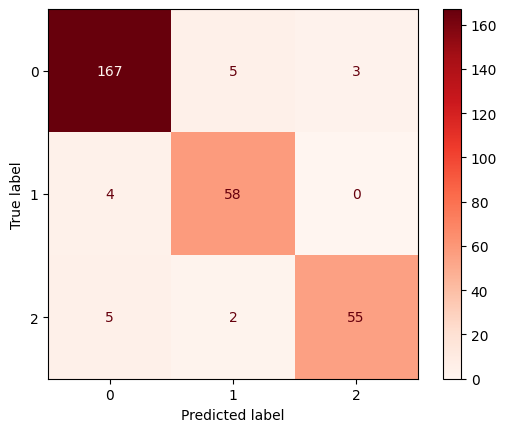

In [486]:
# Check Performance Model against Train-Set

y_pred_train = gbc_ms.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_ms, X_train_final, y_train, cmap='Reds'))

- random search

In [487]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [489]:
# Train with Random Search

gbc_randomcv = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
gbc_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='f1')

In [490]:
# Display Best Hyperparamters from Random Search

gbc_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 120}

In [491]:
gbc_randomcv_best = gbc_randomcv.best_estimator_

F1 Score - Test Set   :  0.7931364067070407 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.85      0.69      0.76        16
           2       0.69      0.73      0.71        15

    accuracy                           0.84        75
   macro avg       0.81      0.78      0.79        75
weighted avg       0.84      0.84      0.84        75
 

Confusion Matrix      : 


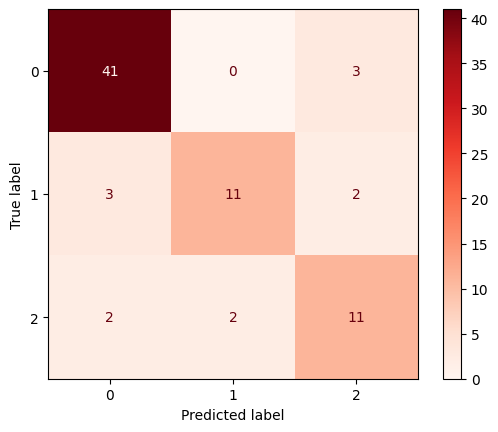

In [492]:
# Check Performance Model against Test-Set

y_pred_test = gbc_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_randomcv_best, X_test_final, y_test, cmap='Reds'))

- Grid Search

In [493]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Mendefinisikan ruang pencarian untuk hyperparameter
grid_search_params = {
    'gbc__n_estimators': [10, 50, 100, 200],  # jumlah pohon dalam hutan
    'gbc__max_depth': [None, 10, 20, 30],  # kedalaman maksimum pohon
    'gbc__min_samples_split': [2, 5, 10],  # jumlah sampel minimum yang diperlukan untuk membagi node internal
    'gbc__min_samples_leaf': [1, 2, 4],  # jumlah sampel minimum yang diperlukan di setiap node daun
}

# Membuat objek pencarian grid dengan validasi silang
grid_search = GridSearchCV(pipe_gbc, grid_search_params, cv=5)

In [494]:

grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__max_depth': [None, 10, 20, 30],
                         'gbc__min_samples_leaf': [1, 2, 4],
                         'gbc__min_samples_split': [2, 5, 10],
                         'gbc__n_estimators': [10, 50, 100, 200]})

In [495]:
grid_search.best_params_

{'gbc__max_depth': None,
 'gbc__min_samples_leaf': 2,
 'gbc__min_samples_split': 2,
 'gbc__n_estimators': 10}

In [496]:
# Get Best Estimator

gbc_gridcv_best = grid_search.best_estimator_

F1 Score - Test Set   :  0.8261058864507141 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.76      0.81      0.79        16
           2       0.79      0.73      0.76        15

    accuracy                           0.87        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.87      0.87      0.87        75
 

Confusion Matrix      : 


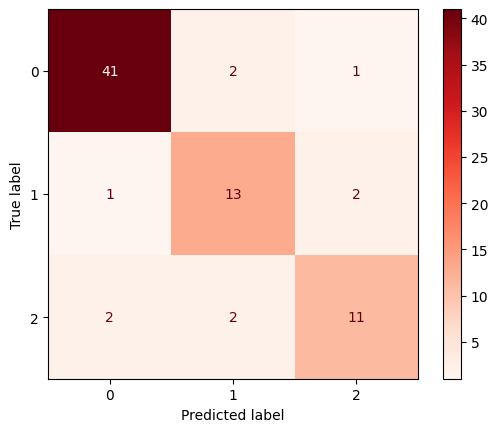

In [497]:
# Check Performance Model against Test-Set

y_pred_test = gbc_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_gridcv_best, X_test_final, y_test, cmap='Reds'))

In [498]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       175
           1       0.89      0.94      0.91        62
           2       0.95      0.89      0.92        62

    accuracy                           0.94       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.94      0.94      0.94       299

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.76      0.81      0.79        16
           2       0.79      0.73      0.76        15

    accuracy                           0.87        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.87      0.87      0.87        75



**Insight** : 
Karena f1-score setelah dilakukan hyperparameter tuning lebih baik, maka yang akan digunakan adalah model gradient boosting yang sudah dilakukan hyperparameter.

# **Model Evaluation**

f1-Score - Train Set   :  0.9272064816684239 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       175
           1       0.89      0.94      0.91        62
           2       0.95      0.89      0.92        62

    accuracy                           0.94       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.94      0.94      0.94       299
 

Confusion Matrix      :


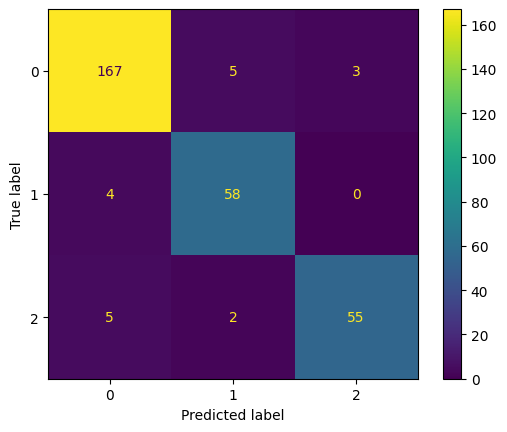

In [510]:
# Check Performance Model against Train-Set

y_pred_train = best_estimator.predict(X_train_final)

print('f1-Score - Train Set   : ', f1_score(y_train, y_pred_train, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      :')
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

f1-score - Test Set   :  0.8261058864507141 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.76      0.81      0.79        16
           2       0.79      0.73      0.76        15

    accuracy                           0.87        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.87      0.87      0.87        75
 

Confusion Matrix      : 


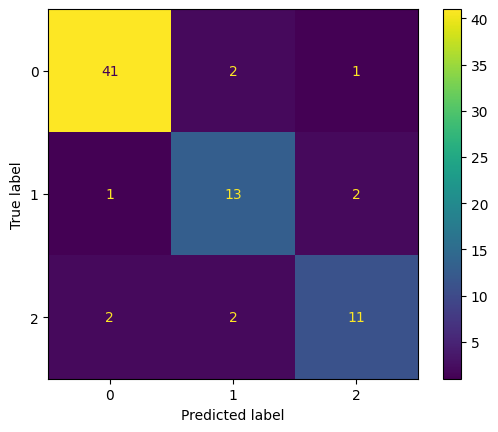

In [511]:
# Check Performance Model against Test-Set

y_pred_test = best_estimator.predict(X_test_final)

print('f1-score - Test Set   : ', f1_score(y_test, y_pred_test, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : ')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

**Insight**:

1. **Performa Model pada Data Latih (Train Set):**
   - Model memiliki akurasi yang sangat baik pada data latih dengan skor akurasi sebesar **0.94**.
   - F1-Score keseluruhan (weighted avg) pada data latih juga sangat baik, yaitu **0.94**.
   - Kelas 0 memiliki performa terbaik dengan F1-Score sebesar **0.95**.
   - Kelas 1 dan 2 memiliki performa yang hampir sama dengan F1-Score sebesar **0.91** dan **0.92** secara berturut-turut.

2. **Performa Model pada Data Uji (Test Set):**
   - Model memiliki akurasi yang baik pada data uji dengan skor akurasi sebesar **0.87**.
   - F1-Score keseluruhan (weighted avg) pada data uji adalah **0.87**.
   - Kelas 0 memiliki performa terbaik dengan F1-Score sebesar **0.93**.
   - Kelas 1 dan 2 memiliki performa yang lebih rendah dibandingkan kelas 0 dengan F1-Score sebesar **0.79** dan **0.76** secara berturut-turut.

3. **Perbandingan Performa Model antara Data Latih dan Data Uji:**
   - Terdapat penurunan performa model ketika diterapkan pada data uji dibandingkan dengan data latih. Hal ini bisa disebabkan oleh overfitting, di mana model belajar terlalu baik pada data latih dan kurang mampu generalisasi pada data yang belum pernah dilihat sebelumnya.
   - F1-Score pada data uji (**0.83**) lebih rendah dibandingkan dengan data latih (**0.93**). Ini menunjukkan bahwa model mungkin perlu dioptimalkan lebih lanjut untuk meningkatkan performanya pada data uji.

# **Model Saving**

In [334]:
# membuat gabungan pipeline preprocess dengan model terbaik
final_model = Pipeline([('proses',preprocess),('model',best_estimator)])

In [335]:
final_model

Pipeline(steps=[('proses',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                       Gender  Occupation  BMI_Category
0         1           9             3
1         1           1             0
2         1           1             0
3         1           6             2
4         1           6             2
5         1           9             2
6         1          10             2
7         1           1             0
8         1           1             0
9         1           1             0
..      ...         ...           ...
364       0           5             3
365       0           5             3
366       0           5             3
367       0           5             3
368       0           5             3
369       0           5             3
370       0           5             3
371       0           5             3
372       0           5             3
373       0           5             3

[374 rows x 3 columns]),
                                                 ('num', StandardScaler(),
                                                       Sleep_Duration  Physical_Activity_Level  Heart_Rate
0                 3                        4         9.5
1                 4                        9         8.0
2                 4                        9...
365              21                       12         2.0
366              22                       12         2.0
367              21                       12         2.0
368              22                       12         2.0
369              22                       12         2.0
370              21                       12         2.0
371              22                       12         2.0
372              22                       12         2.0
373              22                       12         2.0

[374 rows x 3 columns]),
                                                 ('passthrough', 'passthrough',
                                                       Stress_Level
0               3
1               5
2               5
3               5
4               5
5               5
6               4
7               3
8               3
9               3
..            ...
364             0
365             0
366             0
367             0
368             0
369             0
370             0
371             0
372             0
373             0

[374 rows x 1 columns])])),
                ('model',
                 Pipeline(steps=[('gb',
                                  GradientBoostingClassifier(max_depth=None,
                                                             min_samples_leaf=2,
                                                             n_estimators=10))]))])

In [403]:
#Menyimpan fungsi ke format .pkl
with open('final_model.pkl', 'wb') as file_1:
  pickle.dump(final_model, file_1)

# **Model Inference**

In [385]:
#Menyimpan fungsi ke format .pkl
with open('final_model.pkl', 'rb') as file_1:
  final_model == pickle.load(file_1)

In [386]:
# Load the dataset you provided (assuming it's named 'df')
# Replace 'your_dataset.csv' with the actual file path if needed
df_new = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Randomly select a few rows as new data (e.g., 5 rows)
num_new_data_points = 5
data = df_new.sample(n=num_new_data_points, random_state=42)  # Set a random seed for reproducibility

# Display the new data
print("New Data for Model Inference:")
print(data)

New Data for Model Inference:
     Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
329        330  Female   53   Engineer             8.5                 9   
33          34    Male   31     Doctor             6.1                 6   
15          16    Male   29     Doctor             6.0                 6   
325        326  Female   53   Engineer             8.5                 9   
57          58    Male   32     Doctor             6.0                 6   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
329                       30             3       Normal         125/80   
33                        30             8       Normal         125/80   
15                        30             8       Normal         120/80   
325                       30             3       Normal         125/80   
57                        30             8       Normal         125/80   

     Heart Rate  Daily Steps Sleep Disorder  
329          65       

In [387]:
data['Sleep Disorder'].fillna('Normal',inplace=True)

In [388]:
df1['Sleep_Disorder'].replace({'Normal':0,'Sleep Apnea':1, 'Insomnia':2},inplace=True)

In [389]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
329,330,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Normal
33,34,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,Normal
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Normal
325,326,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Normal
57,58,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Normal


In [390]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

In [391]:
data_scaled = scaler.fit_transform(data[num_col])

In [392]:
X = data[['Gender','Occupation','Sleep Duration','Physical Activity Level','Stress Level','BMI Category','Heart Rate']]
y = data[['Sleep Disorder']]

In [393]:
# splitting menjadi train dan test dengan proporsi data train 80%
X_train_inf, X_test_inf, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=10)
print('Train Size : ', X_train_inf.shape)
print('Test Size : ', X_test_inf.shape)

Train Size :  (3, 7)
Test Size :  (2, 7)


In [394]:
model_pipe_gbc = Pipeline([('gbc', GradientBoostingClassifier())])

In [398]:
gb_classifier = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Define the parameter distribution for RandomizedSearchCV
grid_search_params = {
    'gbc__n_estimators': [10, 50, 100, 200],  # jumlah pohon dalam hutan
    'gbc__max_depth': [None, 10, 20, 30],  # kedalaman maksimum pohon
    'gbc__min_samples_split': [2, 5, 10],  # jumlah sampel minimum yang diperlukan untuk membagi node internal
    'gbc__min_samples_leaf': [1, 2, 4],  # jumlah sampel minimum yang diperlukan di setiap node daun
}

# Create the pipeline with GradientBoostingClassifier
inf_pipe = Pipeline([('gbc', gb_classifier)])
# Membuat objek pencarian grid dengan validasi silang
grid_search = GridSearchCV(inf_pipe, grid_search_params, cv=2)

# Fit the random search to the data
grid_search.fit(X_res, y_res)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the results
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'gbc__max_depth': None, 'gbc__min_samples_leaf': 4, 'gbc__min_samples_split': 10, 'gbc__n_estimators': 10}
Best Estimator: Pipeline(steps=[('gbc',
                 GradientBoostingClassifier(max_depth=None, min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=10))])


In [402]:
pred_model_gbc = model_pipe_gbc.fit(X_res,y_res )
pred_model_gbc

Pipeline(steps=[('gbc', GradientBoostingClassifier())])

# **Conclusion**

- Model terbaik ialah Gradient Boosting Classification setelah di hyperparameter tuning menggunakan manual search.
- Namun, masih terdapat penurunan performa model ketika diterapkan pada data uji dibandingkan dengan data latih. Hal ini bisa disebabkan oleh overfitting, di mana model belajar terlalu baik pada data latih dan kurang mampu generalisasi pada data yang belum pernah dilihat sebelumnya.
- F1-Score pada data uji (**0.83**) lebih rendah dibandingkan dengan data latih (**0.93**). Ini menunjukkan bahwa model mungkin perlu dioptimalkan lebih lanjut untuk meningkatkan performanya pada data uji.

# **Conceptual Problems**

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

##### **Answer**  :



Bagging atau Bootstrap Aggregating merupakan metode yang biasanya digunakan untuk mengurangi varians dalam dataset. 

Cara kerja :
- mengambil sampel data acak dari train dengan penggantian
- kemudian dilatih sesuai tugas(regresi/klasifikasi)

Algoritma random forest dianggap sebagai perluasan dari metode bagging, menggunakan bagging dan fitur acak untuk membuat hutan pohon keputusan yang tidak berkorelasi1.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

##### **Answer**    :



- Random Forest dan Boosting adalah dua teknik yang berbeda. 
- Random Forest dibangun menggunakan metode bagging (keputusan digunakan secara paralel dan dapat menyesuaikan subsampel). 
- Dalam klasifikasi, hasilnya ditentukan dengan mengambil semua hasil pohon keputusan.
- Dalam regresi, hasil keseluruhan dihitung dengan mengambil rata-rata semua prediksi.
- Di sisi lain, Boosting menggunakan teknik boosting untuk membangun model ensemble. 
- Untuk membangun pohon baru yang kuat, keputusan dihubungkan dalam seri dimana keputusan tidak sesuai dengan seluruh dataset.

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

##### **Answer**  :

Cross Validation adalah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model pada data yang belum terlihat. 
Perlu dicatat bahwa cross-validation biasanya hanya digunakan untuk model dan data validasi, dan pengujian model masih dilakukan pada set tes yang terpisah.

HuggingFace Link:

https://huggingface.co/spaces/Rideannisa24/Milestone_2